In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import math as m
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', nrows=10000)
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


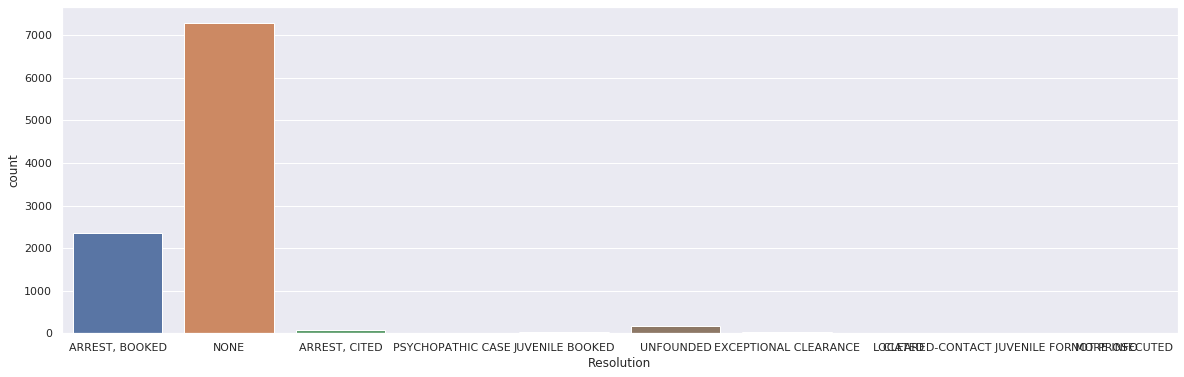

In [4]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(df['Resolution'])
plt.show()

In [3]:
df1 = df[df.Resolution == 'ARREST, BOOKED']
df2 = df[df.Resolution == 'NONE']
df3 = df[df.Resolution == 'ARREST, CITED']
df4 = df[df.Resolution == 'UNFOUNDED']
df = pd.concat([df1, df2, df3, df4])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9898 entries, 0 to 9921
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dates       9898 non-null   object 
 1   Category    9898 non-null   object 
 2   Descript    9898 non-null   object 
 3   DayOfWeek   9898 non-null   object 
 4   PdDistrict  9898 non-null   object 
 5   Resolution  9898 non-null   object 
 6   Address     9898 non-null   object 
 7   X           9898 non-null   float64
 8   Y           9898 non-null   float64
dtypes: float64(2), object(7)
memory usage: 773.3+ KB


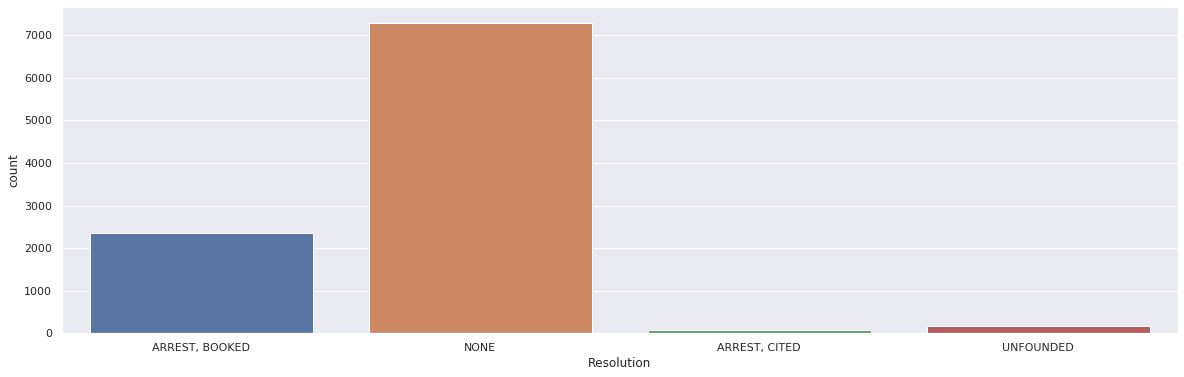

In [6]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(df['Resolution'])
plt.show()
#залишилися 4 класи, які найчастіше зустрічаються

In [4]:
mapping = {k: v for v, k in enumerate(df.Resolution.unique())}
mapping

{'ARREST, BOOKED': 0, 'NONE': 1, 'ARREST, CITED': 2, 'UNFOUNDED': 3}

In [5]:
df['Resolution_num'] = df.Resolution.map(mapping)
df = df.drop(['Resolution'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9898 entries, 0 to 9921
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dates           9898 non-null   object 
 1   Category        9898 non-null   object 
 2   Descript        9898 non-null   object 
 3   DayOfWeek       9898 non-null   object 
 4   PdDistrict      9898 non-null   object 
 5   Address         9898 non-null   object 
 6   X               9898 non-null   float64
 7   Y               9898 non-null   float64
 8   Resolution_num  9898 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 773.3+ KB


In [6]:
df.Resolution_num.unique()

array([0, 1, 2, 3])

In [52]:
df['PdDistrict'].unique()

array(['NORTHERN', 'BAYVIEW', 'MISSION', 'PARK', 'INGLESIDE', 'SOUTHERN',
       'CENTRAL', 'TENDERLOIN', 'TARAVAL', 'RICHMOND'], dtype=object)

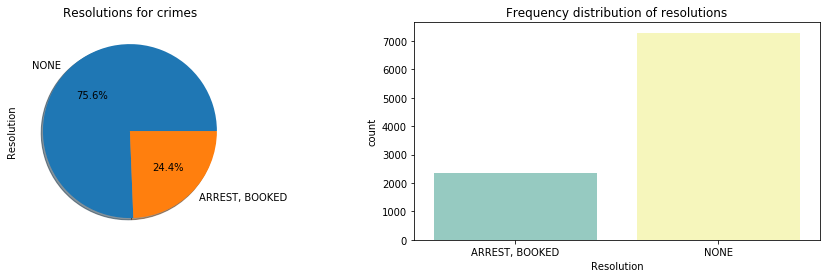

In [55]:
f,ax = plt.subplots(1,2,figsize=(16,4))

ax[0] = df['Resolution'].value_counts().plot.pie(explode=np.zeros(len(df['Resolution'].unique())),autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Resolutions for crimes')
ax[1] = sns.countplot(x="Resolution", data=df, palette="Set3")
ax[1].set_title("Frequency distribution of resolutions")
plt.show()

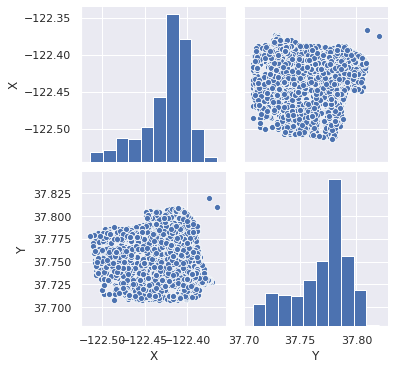

In [7]:
c = 0
for i in df['Resolution'].unique():
    df['Resolution_num'] = [c if value == i ]
df['Resolution_binary'] = [0 if value == 'NONE' else 1 for value in df['Resolution'].values]
sns.pairplot(df)
plt.show()
#nothing useful

In [115]:
df.drop(['X','Y','Dates'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Category           9642 non-null   object
 1   Descript           9642 non-null   object
 2   DayOfWeek          9642 non-null   object
 3   PdDistrict         9642 non-null   object
 4   Resolution         9642 non-null   object
 5   Address            9642 non-null   object
 6   Resolution_binary  9642 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 922.6+ KB


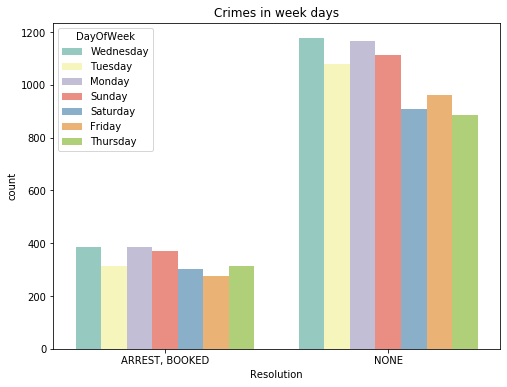

In [59]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Resolution", hue="DayOfWeek", data=df, palette="Set3")
ax.set_title("Crimes in week days")
plt.show()
#for some reason we have more crimes without resolution from sunday to wednesday) 

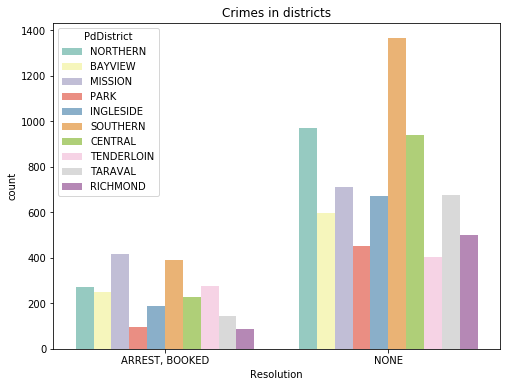

In [61]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Resolution", hue="PdDistrict", data=df, palette="Set3")
ax.set_title("Crimes in districts")
plt.show()
#in central, southern and mission districts we probably have big amout of small crimes

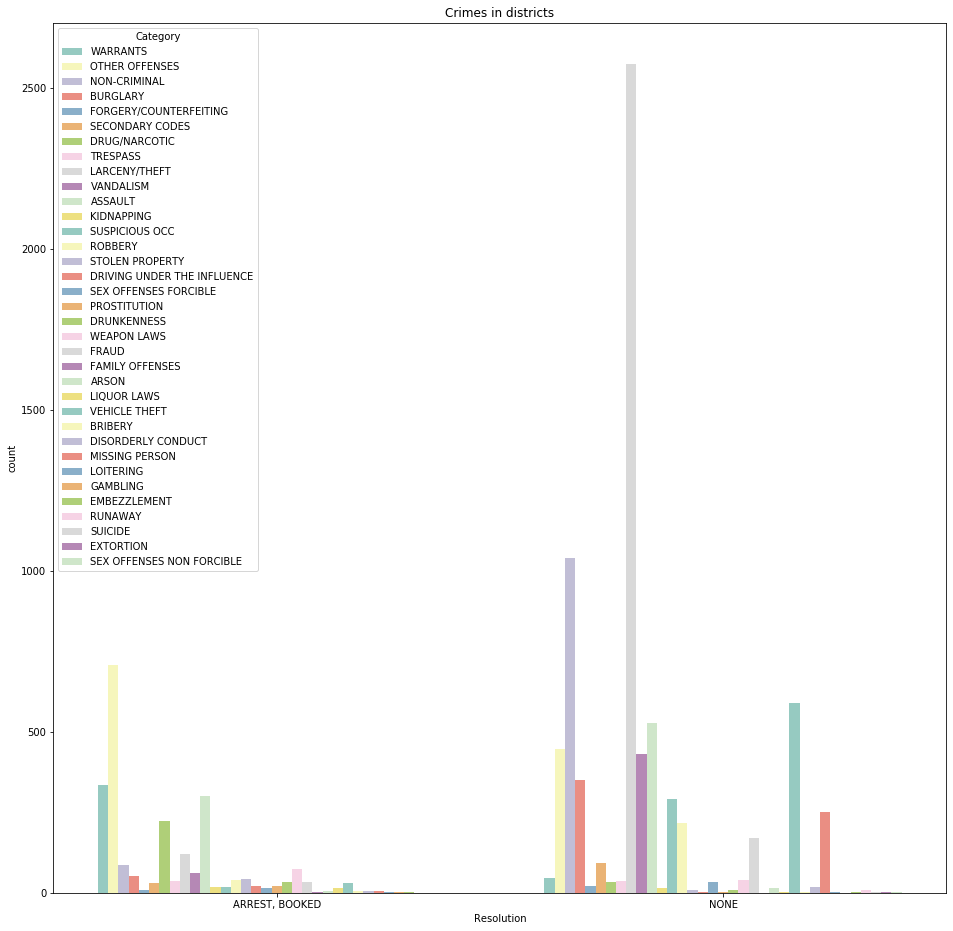

In [65]:
f, ax = plt.subplots(figsize=(16, 16))
ax = sns.countplot(x="Resolution", hue="Category", data=df, palette="Set3")
ax.set_title("Crimes in districts")
plt.show()
#in central, southern and mission districts we probably have big amout of small crimes

In [88]:
df.drop(['Resolution', 'Address'],1)

,Category,DayOfWeek,PdDistrict,Resolution_binary
0,WARRANTS,Wednesday,NORTHERN,1
1,OTHER OFFENSES,Wednesday,NORTHERN,1
2,OTHER OFFENSES,Wednesday,NORTHERN,1
18,OTHER OFFENSES,Wednesday,BAYVIEW,1
31,NON-CRIMINAL,Wednesday,MISSION,1
...,...,...,...,...
9993,LARCENY/THEFT,Sunday,CENTRAL,1
9994,BURGLARY,Sunday,PARK,1
9995,ASSAULT,Sunday,NORTHERN,1
9996,VANDALISM,Sunday,TARAVAL,1


### Encoding data

In [6]:
y = df['Resolution_num']
X = df.drop(['Address', 'Descript', 'X', 'Y', 'Dates', 'Resolution_num'],1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9898 entries, 0 to 9921
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    9898 non-null   object
 1   DayOfWeek   9898 non-null   object
 2   PdDistrict  9898 non-null   object
dtypes: object(3)
memory usage: 309.3+ KB


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
X_train.shape, X_test.shape

((7918, 3), (1980, 3))

In [8]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
print(categorical) 
print(numerical)

['Category', 'DayOfWeek', 'PdDistrict']
[]


In [9]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=categorical)


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [45]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


hl_sizes=[(392,),(196,49)]
activations=['logistic', 'tanh', 'relu']
alphas = np.array([1,0.1,0.001,0])
model = MLPClassifier()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas,hidden_layer_sizes=hl_sizes
                                                     ,activation=activations))

#works really hard)
grid.fit(X_train[:500], y_train[:500])
print(grid)
print('-------------------------------------------------------------------------------------')
print('Best score          :   ',grid.best_score_)
print('Alpha               :   ',grid.best_estimator_.alpha)
print('Hidden_layer_sizes  :   ',grid.best_estimator_.hidden_layer_sizes)
print('Solver              :   ',grid.best_estimator_.solver)
print('Activation          :   ',grid.best_estimator_.activation)



GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_gr

In [46]:
from sklearn.metrics import classification_report

y_test_pred=grid.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63       455
           1       0.86      0.90      0.88      1472
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        43

    accuracy                           0.81      1980
   macro avg       0.38      0.38      0.38      1980
weighted avg       0.79      0.81      0.80      1980



/home/dimulya/.pyenv/versions/3.8.1/envs/jupyter_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [48]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.815


In [49]:
y_test_pred = clf.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [53]:
accuracy_ts = accuracy_score(y_test, y_test_pred)
precision_ts = precision_score(y_test, y_test_pred, average='micro')
recall_ts = recall_score(y_test, y_test_pred, average='micro')
print('Accuracy       : ', accuracy_ts)
print('Precision      : ', precision_ts)
print('Recall         : ', recall_ts)

Accuracy       :  0.8146464646464646
Precision      :  0.8146464646464646
Recall         :  0.8146464646464646


### Custom Classification

In [54]:
class NeuralNet:
    
    
    def __init__(self, normalize = False, learning_rate = 0.01, max_iter = 100,\
                 hidden_layer_sizes=(100,), beta=0.999, epsilon=1e-8, tol=1e-6, batch_size=2048,\
                 print_cost=True):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.normalize = normalize
        self.hidden_layer_sizes = hidden_layer_sizes
        self.n_layers = 1 + len(hidden_layer_sizes)
        self.epsilon = epsilon
        self.tol = tol
        self.beta = beta
        self.batch_size = batch_size
        self.print_cost = print_cost
    
    def __normalize(self, X, mean = None, std = None):
        n = X.shape[0]
        m = mean
        if m is None:
            m = np.mean(X, axis=1).reshape((n, 1))
        s = std
        if s is None:
            s = np.std(X, axis=1).reshape((n, 1))
        X_new = (X - m) / s**2
        return X_new, m, s

    def __sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
    
    def __initialize_parameters(self, n_x, hidden_layers, n_y):
        np.random.seed(1)
        W = list()
        b = list()
        self.S_dW = list()
        self.S_db = list()
        
        h = list(hidden_layers)
        h.insert(0, n_x)
        h.append(n_y)
        hidden_layers = tuple(h)
        
        for i in range(1, self.n_layers+1):
            W.append(np.random.randn(hidden_layers[i], hidden_layers[i-1]) / np.sqrt(
                hidden_layers[i - 1]))
            b.append(np.zeros((hidden_layers[i], 1)))
            
            self.S_dW.append(np.zeros((hidden_layers[i], hidden_layers[i-1])))
            self.S_db.append(np.zeros((hidden_layers[i], 1)))

        self.parameters = {"W" : W, "b" : b}
    
    def __forward_propagation(self, X):
        W = self.parameters["W"]
        b = self.parameters["b"]

        A = list()
        Z = list()
               
        for i in range(0, self.n_layers-1):
            if i == 0:
                Z.append(np.dot(W[i], X) + b[i])
            else:
                Z.append(np.dot(W[i], A[i-1]) + b[i])
            A.append(self.__sigmoid(Z[i]))
        
        Z.append(np.dot(W[-1], A[-1]) + b[-1])
        A.append(self.softmax(Z[-1]))
        
        cache = (W, b, Z, A)

        return A[-1], cache
    
    def __sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return np.multiply(s, (1 - s))
    
    def cross_entropy(self, A, Y):
        return - np.sum(np.log(A) * (Y), axis=1)
    
    def compute_cost(self, A, Y):
        J = -np.mean(Y.T * np.log(A.T+ 1e-8))
        return J
        
    def __backward_propagation(self, X, Y, cache):
        m = X.shape[1]
        n = X.shape[0]
        (W, b, Z, A) = cache
        
        dW = [None] * (self.n_layers)
        dA = [None] * (self.n_layers)
        dZ = [None] * (self.n_layers)
        db = [None] * (self.n_layers)
        
        dZ[-1] = (A[-1] - Y)
        dW[-1] = (1. / m * np.dot(dZ[-1], A[-2].T))
        db[-1] = (1. / m * np.sum(dZ[-1], axis = 1, keepdims = True))
        dA[-1] = np.dot(W[-1].T, dZ[-1])
        
        for i in range(self.n_layers-1, 0, -1):
            dZ[i-1] = np.multiply(dA[i], self.__sigmoid_derivative(Z[i-1]))
            if i-1 == 0:
                dW[i-1] = 1. / m * np.dot(dZ[i-1], X.T)
            else:
                dW[i-1] = 1. / m * np.dot(dZ[i-1], A[i-2].T)
            db[i-1] = 1. / m * np.sum(dZ[i-1], axis = 1, keepdims = True) 
            dA[i-1] = np.dot(W[i-1].T, dZ[i-1])
        
        grads = {"dZ" : dZ, "dW" : dW, "db" : db}
        return grads
    
    def __update_parameters(self, grads):
        W = self.parameters["W"]
        b = self.parameters["b"]

        dW = grads["dW"]
        db = grads["db"]
        
        for i in range(self.n_layers):
            self.S_dW[i] = self.beta * self.S_dW[i] + (1 - self.beta) * np.power(dW[i], 2)
            self.S_db[i] = self.beta * self.S_db[i] + (1 - self.beta) * np.power(db[i], 2)
            W[i] = W[i] - self.learning_rate * dW[i] / (np.sqrt(self.S_dW[i]) + self.epsilon)
            b[i] = b[i] - self.learning_rate * db[i] / (np.sqrt(self.S_db[i]) + self.epsilon)
            
        self.parameters = {"W" : W, "b" : b}
        
    def create_mini_batches(self, X, Y, batch_size): 
        m = X.shape[1]
        mini_batches = [] 
        
        batch_size = self.batch_size if self.batch_size != None else m
        
        permutation = list(np.random.permutation(m))
        shuffled_X = X[:, permutation]
        
        shuffled_Y = Y[:, permutation]
         
        n_minibatches = m // batch_size 

        for i in range(n_minibatches + 1): 
            X_mini = shuffled_X[:, i*batch_size : (i + 1)*batch_size]
            Y_mini = shuffled_Y[:, i*batch_size : (i + 1)*batch_size] 
            mini_batches.append((X_mini, Y_mini)) 
        if m % batch_size != 0: 
            X_mini = shuffled_X[:, i*batch_size:]
            Y_mini = shuffled_Y[:, i*batch_size:]
            mini_batches.append((X_mini, Y_mini)) 
        return mini_batches 

    def fit(self, X_vert, Y_vert):
        self.n_iter = 0
        X, Y = X_vert.T, Y_vert.T
        
        if self.normalize:
            X, self.__mean, self.__std = self.__normalize(X)
        
        costs = []
        cost_history = []
        
        m = X.shape[1]
        n_x = X.shape[0]
        n_y = Y.shape[0]
        
        self.__initialize_parameters(n_x, self.hidden_layer_sizes, n_y)

        
        
        for i in range(self.max_iter):
            self.n_iter = i
            
            mini_batches = self.create_mini_batches(X, Y, self.batch_size)
            
            for (mini_X, mini_Y) in mini_batches:
                A, cache = self.__forward_propagation(mini_X)

                cost = self.compute_cost(A, mini_Y)

                grads = self.__backward_propagation(mini_X, mini_Y, cache)

                self.__update_parameters(grads)
            
            cost_history.append(cost)
            
            if self.print_cost and i % 10 == 0:
                print("{}-th iteration: {}".format(i, cost))

            #if i % 10 == 0:
            costs.append(cost)
  
            if i > 1 and abs(cost-cost_history[-2]) < self.tol:
                break

        if self.print_cost:
            plt.plot(costs)
            plt.ylabel("Cost")
            plt.xlabel("Iteration")
            plt.show()
    
    def predict_proba(self, X_vert):
        X = X_vert.T
        if self.normalize:
            X, _, _ = self.__normalize(X, self.__mean, self.__std)
        
        probs = self.__forward_propagation(X)[0]
        
        return probs.T
    
    def predict(self, X_vert):
        positive_probs = self.predict_proba(X_vert)
        y_pred = self.to_classlabel(positive_probs)
        return y_pred  

    def to_classlabel(self, z):
        return z.argmax(axis=1)
    
    def score(self, X, y, sample_weight=None):
        from sklearn.metrics import accuracy_score
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        return accuracy

In [55]:
encoder = ce.OneHotEncoder()

y_train_e = encoder.fit_transform(y_train.values.reshape(-1, 1))

0-th iteration: 0.0829200805901644
10-th iteration: 0.011854125556137945
20-th iteration: 0.007465627592633321
30-th iteration: 0.008567239158232352
40-th iteration: 0.004184799633669686
50-th iteration: 0.0062146880573081585
60-th iteration: 0.0023691058327074918
70-th iteration: 0.0025240840450007312
80-th iteration: 0.0029735177498223953
90-th iteration: 0.0024793799663636205


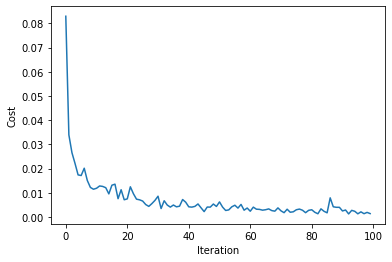

In [56]:
clf = NeuralNet()
clf.fit(X_train, y_train_e)

In [57]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.764


In [58]:
y_test_pred = clf.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label='positive', average='weighted')
recall = recall_score(y_test, y_test_pred, pos_label='positive', average='weighted')

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Result for test

In [60]:
print('Custom Logistic Regression (Test)')
print('Accuracy       : ', accuracy)
print('Precision      : ', precision)
print('Recall         : ', recall)

Custom Logistic Regression (Test)
Accuracy       :  0.7637619047619048
Precision      :  0.7637619047619048
Recall         :  0.7637619047619048


Custom regression gives bigger error, but i think it's very hard to predict judgement for any algorithm